In [4]:
from scipy import misc
from scipy import ndimage

import numpy as np
import matplotlib.pyplot as plt

# Kernels is a simple class which contains the filter-kernels.
# Didn't want to dumb this file
import kernels

In [5]:
img = misc.ascent()
print(img.shape)

(512, 512)


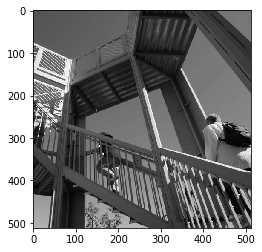

In [6]:
plt.gray()
plt.imshow(img)
plt.show()

In [7]:
simpleFilter = [-1,0,1]

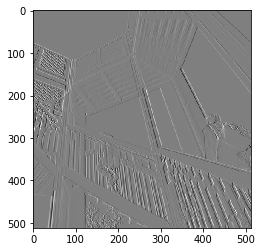

In [8]:
xEdges = ndimage.filters.convolve1d(img,simpleFilter)
plt.imshow(xEdges)
plt.show()

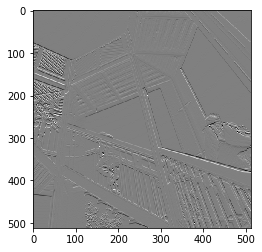

In [9]:
yEdges = ndimage.filters.convolve1d(img,simpleFilter,axis=0);
plt.imshow(yEdges)
plt.show()

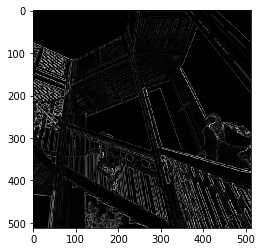

In [10]:
fullEdges = np.sqrt(np.power((yEdges*0.5),2) + np.power((xEdges*0.5),2))
plt.imshow(fullEdges)
plt.show()

In [138]:
def magnitude(xAxis,yAxis):
    return np.sqrt(np.power(yAxis,2) + np.power(xAxis,2))

def direction(xAxis,yAxis):
    return np.asarray([np.max(np.arctan([a,b])) for a,b in np.nditer([xAxis,yAxis])]).reshape(512,512)

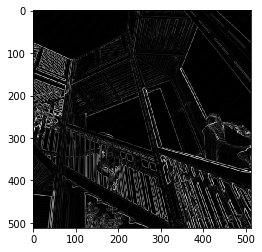

In [143]:
prewittX = ndimage.filters.convolve(img,kernels.prewittX)
prewittY = ndimage.filters.convolve(img,kernels.prewittY)
prewitt = magnitude(prewittX,prewittY)
plt.imshow(prewitt)
plt.show()

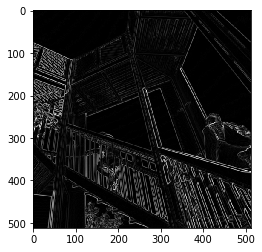

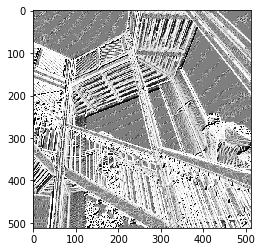

In [144]:
sobelX = ndimage.filters.convolve(img,kernels.sobelX)*0.125
sobelY = ndimage.filters.convolve(img,kernels.sobelY)*0.125
sobel = magnitude(sobelX,sobelY)
sobeldirs = direction(sobelX,sobelY)
plt.imshow(sobel)
plt.show()
plt.imshow(sobeldirs)
plt.show()

In [141]:
kernels.extendedSobel

[array([[-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]]), array([[-2, -1,  0],
        [-1,  0,  1],
        [ 0,  1,  2]]), array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]), array([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0]]), array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]), array([[ 2,  1,  0],
        [ 1,  0, -1],
        [ 0, -1, -2]]), array([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]]), array([[ 0, -1, -2],
        [ 1,  0, -1],
        [ 2,  1,  0]])]

In [18]:
extS = np.asarray(kernels.extendedSobel)
extS.shape

(8, 3, 3)

In [29]:
def compass(img, filterarray, coeff):
    imgArr = np.asarray([ndimage.filters.convolve(img,filter)*coeff for filter in filterarray])
    helper = imgArr.transpose(1,2,0)
    magnitude = helper.max(axis=2)
    compass = helper.argmax(axis=2)
    return magnitude,compass

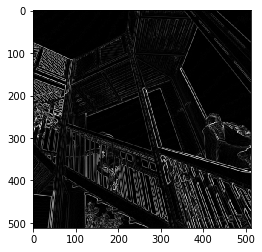

In [69]:
cleary = compass(img,extS,0.125)
plt.imshow(cleary[0])

In [70]:
cleary[1]

array([[0, 0, 7, ..., 0, 0, 0],
       [0, 7, 7, ..., 0, 0, 0],
       [6, 6, 6, ..., 0, 0, 0],
       ...,
       [4, 4, 4, ..., 7, 7, 0],
       [0, 0, 0, ..., 7, 0, 1],
       [0, 0, 0, ..., 6, 5, 5]], dtype=int64)